# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from urllib.parse import quote

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(f"Number of cities in the list: {len(cities)}")
print(cities)

['margaret river', 'grytviken', 'isafjordur', 'shimoda', 'ilulissat', 'la passe', 'aasiaat', 'lewistown', 'mount gambier', 'tazovsky', 'sisak', 'laguna de perlas', 'fuvahmulah', 'bethel', 'edinburgh of the seven seas', 'aykhal', 'hinton', 'constantia', 'chibougamau', 'ushuaia', 'papatowai', 'adamstown', 'okha', 'borger', 'mongo', 'port-aux-francais', 'keflavik', 'tonkino', 'ancud', 'enewetak', 'fort st. john', 'codrington', 'georgetown', "ivdel'", 'albany', 'lincheng', 'bilibino', 'arish', 'punta arenas', 'ribeira grande', 'puerto natales', 'urengoy', 'kodiak', 'vorgashor', 'port mathurin', 'saint-joseph', 'formosa do rio preto', 'guarapari', 'newman', 'piti village', 'utrik', 'new norfolk', 'priargunsk', 'opuwo', 'port alberni', 'northam', 'blackmans bay', 'palmer', 'puerto ayora', 'hawaiian paradise park', 'kill devil hills', 'ulsteinvik', 'yellowknife', 'mossel bay', 'plastun', 'chanderi', 'waitangi', 'luderitz', 'isiklar', 'petropavlovsk-kamchatsky', 'praia da vitoria', 'lebu', 'ya

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):


    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={quote(city)}&appid={weather_api_key}&units=metric"
    #print(f"Processing URL: {city_url}")  # Print the URL for debugging


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(f"Response: {city_weather}")  # Print the raw JSON response

        
        if city_weather.get("cod") != 200:  # Check for error codes in the response
            print(f"City not found: {city}. Error: {city_weather.get('message')}")
            continue


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | shimoda
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | la passe
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | lewistown
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | sisak
Processing Record 12 of Set 1 | laguna de perlas
Processing Record 13 of Set 1 | fuvahmulah
City not found: fuvahmulah. Error: city not found
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | hinton
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | chibougamau
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | papatowai

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,18.53,91,76,2.22,AU,1736703449
1,grytviken,-54.2811,-36.5092,8.19,64,81,7.32,GS,1736703450
2,isafjordur,66.0755,-23.1240,3.02,93,100,1.54,IS,1736703451
3,shimoda,34.6667,138.9500,5.47,71,100,3.34,JP,1736703452
4,ilulissat,69.2167,-51.1000,-31.55,98,83,2.91,GL,1736703453


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.53,91,76,2.22,AU,1736703449
1,grytviken,-54.2811,-36.5092,8.19,64,81,7.32,GS,1736703450
2,isafjordur,66.0755,-23.1240,3.02,93,100,1.54,IS,1736703451
3,shimoda,34.6667,138.9500,5.47,71,100,3.34,JP,1736703452
4,ilulissat,69.2167,-51.1000,-31.55,98,83,2.91,GL,1736703453


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

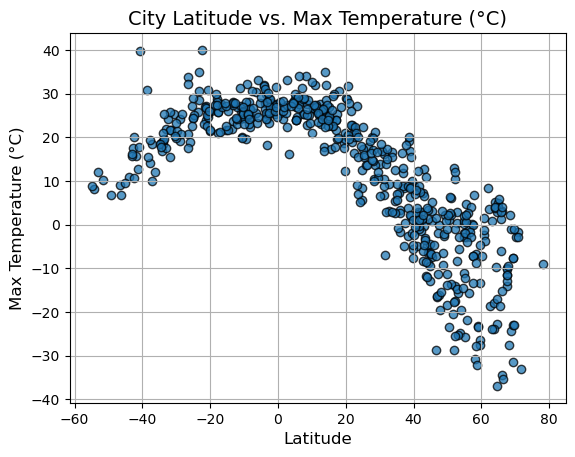

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

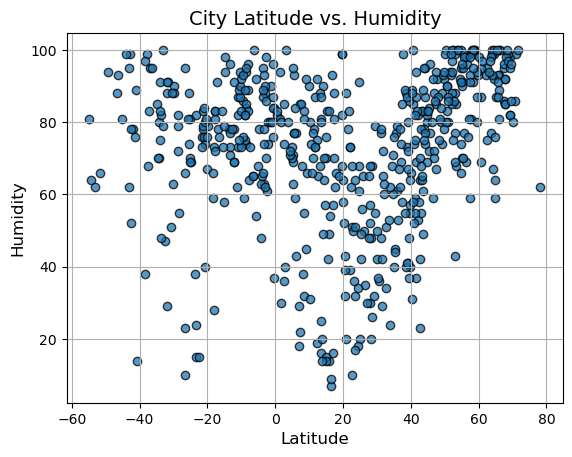

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

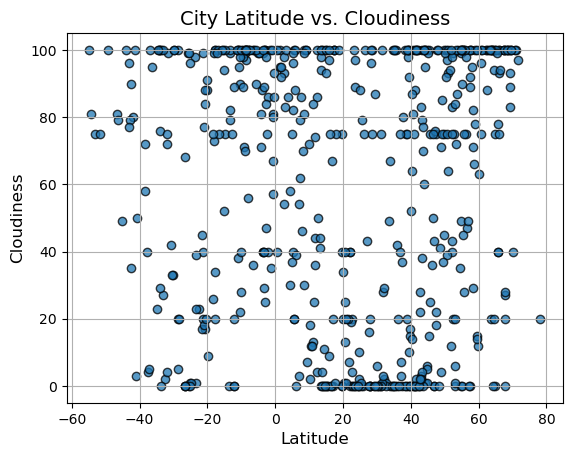

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

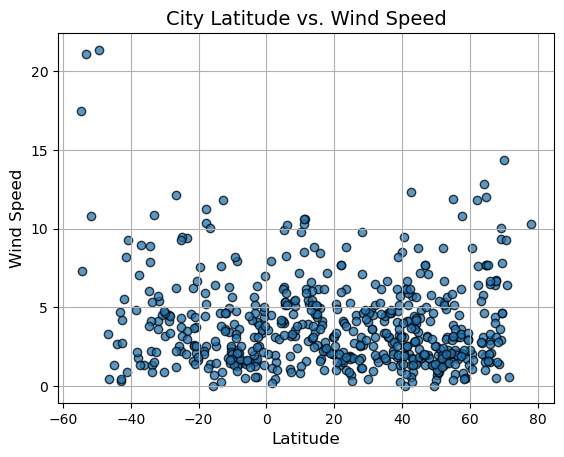

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    """
    Creates a scatter plot with a linear regression line.
    
    Parameters:
    - x_values: Array-like, the independent variable (e.g., latitude)
    - y_values: Array-like, the dependent variable (e.g., temperature)
    - x_label: String, label for the x-axis
    - y_label: String, label for the y-axis
    - title: String, title of the plot
    
    Returns:
    - None
    """

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75, label="Data Points")
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}")
    
    # Add labels, title, and legend
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isafjordur,66.0755,-23.1240,3.02,93,100,1.54,IS,1736703451
3,shimoda,34.6667,138.9500,5.47,71,100,3.34,JP,1736703452
4,ilulissat,69.2167,-51.1000,-31.55,98,83,2.91,GL,1736703453
5,la passe,45.5549,-0.8967,3.13,77,25,4.86,FR,1736703455
6,aasiaat,68.7098,-52.8699,-24.35,99,100,1.38,GL,1736703456


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.53,91,76,2.22,AU,1736703449
1,grytviken,-54.2811,-36.5092,8.19,64,81,7.32,GS,1736703450
8,mount gambier,-37.8333,140.7667,14.06,99,40,1.80,AU,1736703459
13,edinburgh of the seven seas,-37.0676,-12.3116,18.50,95,100,8.94,SH,1736703464
18,ushuaia,-54.8000,-68.3000,8.81,81,100,17.49,AR,1736703470


###  Temperature vs. Latitude Linear Regression Plot

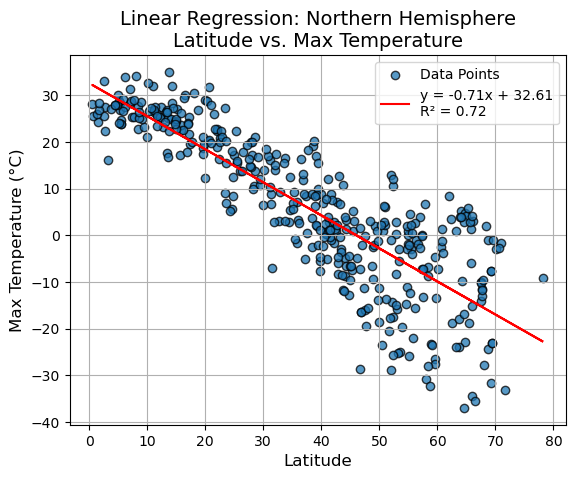

In [75]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Max Temp"],
    x_label = "Latitude",
    y_label = "Max Temperature (°C)",
    title = "Linear Regression: Northern Hemisphere\nLatitude vs. Max Temperature",
)

# Display plot
plt.show()

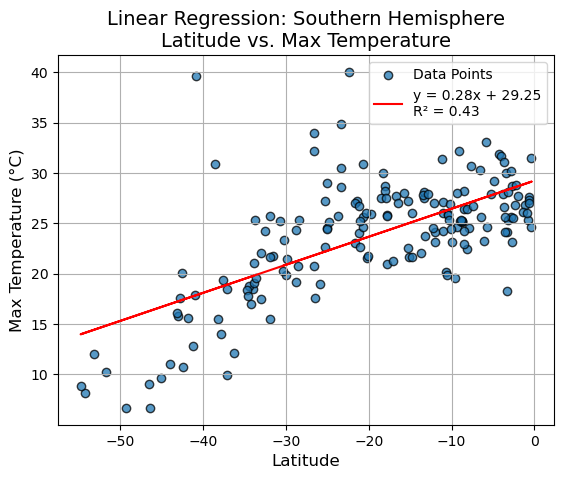

In [77]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Max Temp"],
    x_label = "Latitude",
    y_label = "Max Temperature (°C)",
    title = "Linear Regression: Southern Hemisphere\nLatitude vs. Max Temperature",
)

# Display plot
plt.show()

**Discussion about the linear relationship:**  There is a strong linear relationship between temperature and lattitude the farther you get from 0 (the equator).  It appears to be stronger (steeper slope) in the northern hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

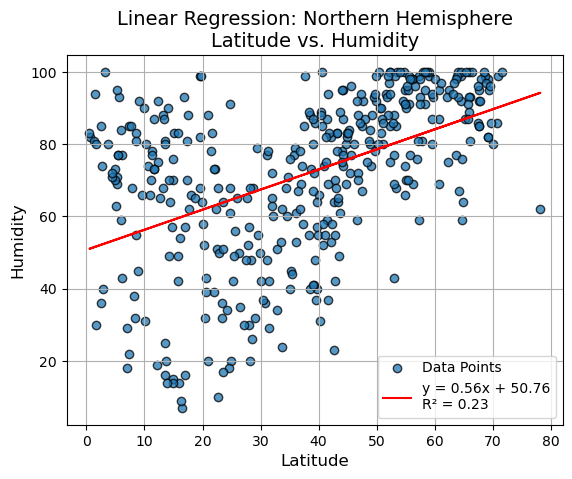

In [78]:
# Northern Hemisphere
plot_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Humidity"],
    x_label = "Latitude",
    y_label = "Humidity",
    title = "Linear Regression: Northern Hemisphere\nLatitude vs. Humidity",
)

# Display plot
plt.show()

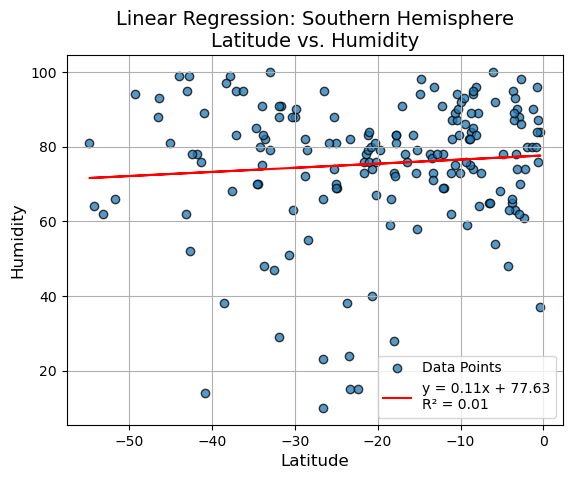

In [79]:
# Southern Hemisphere
plot_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Humidity"],
    x_label = "Latitude",
    y_label = "Humidity",
    title = "Linear Regression: Southern Hemisphere\nLatitude vs. Humidity",
)

# Display plot
plt.show()

**Discussion about the linear relationship:** There appears to be linear relationship between humidity and latitude in the northern hemisphere but that is almost none existent in the southern hemisphere.  The slope in the southern hemisphere is very small.  This could be because humidity is impacted by the presence of water and there is a lot more water in the southern hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

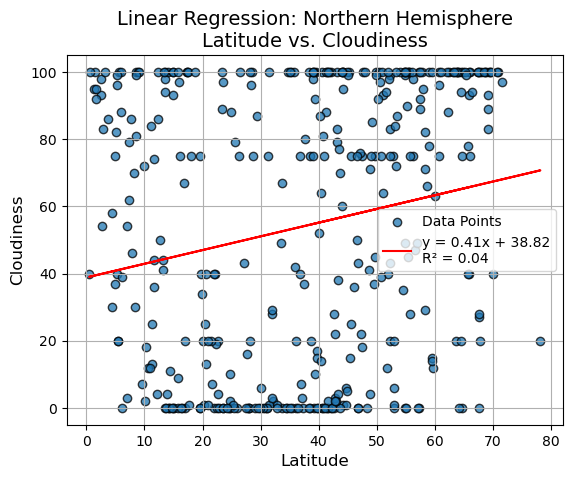

In [80]:
# Northern Hemisphere
plot_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Cloudiness"],
    x_label = "Latitude",
    y_label = "Cloudiness",
    title = "Linear Regression: Northern Hemisphere\nLatitude vs. Cloudiness",
)

# Display plot
plt.show()

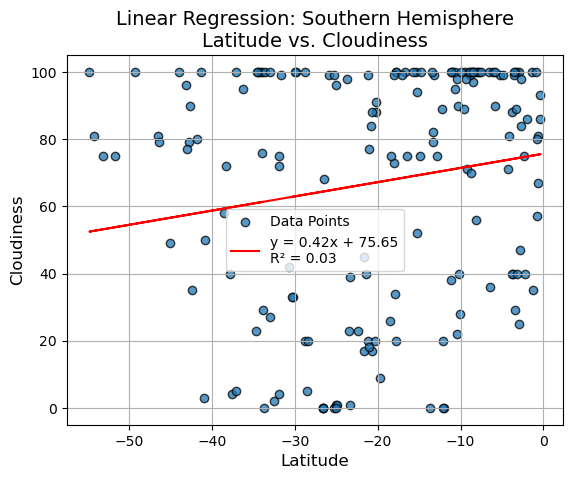

In [81]:
# Southern Hemisphere
plot_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Cloudiness"],
    x_label = "Latitude",
    y_label = "Cloudiness",
    title = "Linear Regression: Southern Hemisphere\nLatitude vs. Cloudiness",
)

# Display plot
plt.show()

**Discussion about the linear relationship:** This is an odd linear relationship in that is doesnt appear to be centered around the equator but simply the value of lattitude. This could also have to do with the fact that there is mostly water in the southern hemisphere and with less land mass there are less obstacles for the wind and moisture to get around which can cause uplifting which causes clouds.  

### Wind Speed vs. Latitude Linear Regression Plot

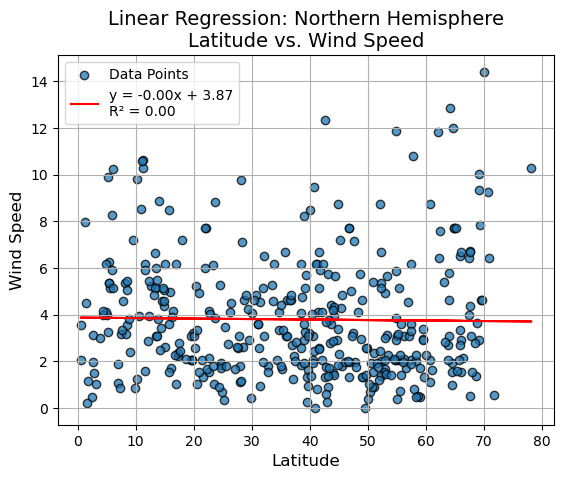

In [82]:
# Northern Hemisphere
plot_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Wind Speed"],
    x_label = "Latitude",
    y_label = "Wind Speed",
    title = "Linear Regression: Northern Hemisphere\nLatitude vs. Wind Speed",
)

# Display plot
plt.show()

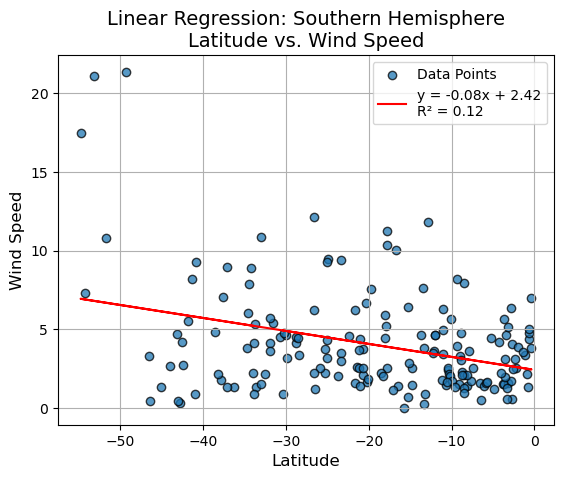

In [83]:
# Southern Hemisphere
plot_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Wind Speed"],
    x_label = "Latitude",
    y_label = "Wind Speed",
    title = "Linear Regression: Southern Hemisphere\nLatitude vs. Wind Speed",
)

# Display plot
plt.show()